# Model the data

In [7]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import os
import pandas as pd
from sklearn import svm
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import math

In [2]:
%matplotlib inline

path='/Users/brianna/Documents/WL_DBdeets/'

## Build a model and study the results

In [26]:
# This example is written for a generic classifier model (here, using a RandomForestClassifier)

### Classifier

In [3]:
classifierVersion = 1
features = ['NumberSignedUpFromCompany_i_log',
          'MeetingsTotalWeek0_i_log',
          'PortionOfOrganizerWeek0_i_log',
          'added_meetingWeek0_i_log',
          'added_agenda_itemWeek0_i_log',
          'assigned_action_itemWeek0_i_log']
prediction = 'RetentionStatus2Levels'
#prediction = 'RetentionStatus'
classifier = RandomForestClassifier(n_estimators=1000, max_depth=20, min_samples_leaf=5)

In [5]:
classifierVersion = 1
features = ['NumberSignedUpFromCompany',
          'MeetingsTotalWeek0_i','MeetingsTotalWeek1_0diff',
          'PortionOfOrganizerWeek0','PortionOfOrganizerWeek1_0diff',
          'AveNumAttendeesWeek0','AveNumAttendeesWeek1_0diff',
          'completed_WL_actionWeek0','completed_WL_actionWeek1_0diff',
          'EmailCorporateVsPrivate']

prediction = 'RetentionStatus2Levels'
#prediction = 'RetentionStatus'
classifier = RandomForestClassifier(n_estimators=1000, max_depth=20, min_samples_leaf=5)

In [ ]:
classifierVersion = 2
features = ['MeetingsTotalWeek0_i','MeetingsTotalWeek1_0diff',
            'PortionOfOrganizerWeek0_i','PortionOfOrganizerWeek1_0diff',
            'AveNumAttendeesWeek0_i', 'AveNumAttendeesWeek1_0diff',
            'NumberSignedUpFromCompany', 
            'sharedEmail',
            'EmailCorporateVsPrivate']
#prediction = 'WeeksVisitedOutOf12'
prediction = 'RetentionStatus'
classifier = RandomForestClassifier(n_estimators=1000, max_depth=20, min_samples_leaf=5)


In [ ]:
classifierVersion = 3
features = ['NumberSignedUpFromCompany', 
            'added_meetingWeek0','added_meetingWeek1_0diff',
            'added_agenda_itemWeek0', 'added_agenda_itemWeek1_0diff',
            'assigned_action_itemWeek0','assigned_action_itemWeek1_0diff']
#prediction = 'WeeksVisitedOutOf12'
prediction = 'RetentionStatus2Levels'
classifier = RandomForestClassifier(n_estimators=1000, max_depth=20, min_samples_leaf=5)


In [ ]:
classifierVersion = 4
features = ['NumberSignedUpFromCompany',
            'added_meetingWeek0','added_meetingWeek1_0diff',
            'added_agenda_itemWeek0', 'added_agenda_itemWeek1_0diff']
#prediction = 'WeeksVisitedOutOf12'
prediction = 'RetentionStatus2Levels'
classifier = RandomForestClassifier(n_estimators=1000, max_depth=20, min_samples_leaf=5)


In [ ]:
classifierVersion = 5
features = ['NumberSignedUpFromCompany',
            'added_meetingWeek0',
            'added_agenda_itemWeek0']
#prediction = 'WeeksVisitedOutOf12'
prediction = 'RetentionStatus2Levels'
classifier = RandomForestClassifier(n_estimators=1000, max_depth=20, min_samples_leaf=5)


# Read the data

In [10]:
modelData = pd.read_csv(path+'06_DataFinal.csv')

# Remove the upper numbers for these two variables where the slope starts to flatten out.
modelData.loc[modelData.NumberSignedUpFromCompany_i_log>math.log(30),'NumberSignedUpFromCompany_i_log']=None
modelData.loc[modelData.MeetingsTotalWeek0_i_log>math.log(20),'MeetingsTotalWeek0_i_log']=None


In [11]:
# Remove all rows with null values and see how many rows you have left.
columns = features[:]
columns.append(prediction)
print('Columns remaining after rows with NA\'s removed: '+str(len(modelData.dropna(subset=columns))))
modelData=modelData.dropna(subset=columns)
modelData[columns].head()

Columns remaining after rows with NA's removed: 6792


,NumberSignedUpFromCompany_i_log,MeetingsTotalWeek0_i_log,PortionOfOrganizerWeek0_i_log,added_meetingWeek0_i_log,added_agenda_itemWeek0_i_log,assigned_action_itemWeek0_i_log,RetentionStatus2Levels
0,2.197225,1.609438,0.000000,0.000000,0.000000,0.000000,1
1,2.197225,1.945910,0.154151,0.000000,0.000000,0.000000,0
2,2.197225,1.098612,0.000000,0.693147,1.386294,0.000000,0
3,2.197225,2.397895,0.000000,0.693147,2.564949,1.851915,1
5,2.197225,1.098612,0.000000,0.000000,0.000000,1.851915,0


In [12]:
# classifierVersion = 2
# surveyVersion = 1
# features = ["genderBoolean", "ageCategory", "medianHouseholdIncome", "fulltimeMedianIncome"]
# prediction = "incomeCategory"
# classifier = RandomForestClassifier(n_estimators=500, max_depth=20, min_samples_leaf=5)

In [13]:
versionLabel = "version-{version:02d}".format(version=classifierVersion)
modelLabel = "{model}".format(model=classifier.__class__.__name__)
predictionLabel = "{prediction}".format(prediction=prediction)

In [14]:
# test_size = 20% of data for testing
X_train, X_test, Y_train, Y_test = train_test_split(modelData[features], modelData[prediction].values, test_size=0.20)
train = len(X_train)/float(len(modelData))
test = len(X_test)/float(len(modelData))
print "The model data have been split into train data ({train:.2%}) and test data ({test:.2%})".format(train=train, test=test)

The model data have been split into train data (79.99%) and test data (20.01%)


In [15]:
classifier.verbose = True
classifier.n_jobs = -1 # do as many jobs as there's room for on the computer
classifier.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.9s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=True,
            warm_start=False)

In [16]:
# Predictions:
Y_pred = classifier.predict(X_test)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.7s finished


In [17]:
# Probabilities:
Y_proba = classifier.predict_proba(X_test)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.6s finished


### Scores

Definitions:

- *True Positives* are those which are labeled ``1`` which are actually ``1``
- *False Positives* are those which are labeled ``1`` which are actually ``0``
- *True Negatives* are those which are labeled ``0`` which are actually ``0``
- *False Negatives* are those which are labeled ``0`` which are actually ``1``


Meaning of the different scores:

$$ {\rm accuracy} \equiv \frac{\rm correct~labels}{\rm total~samples} $$

$$ {\rm precision} \equiv \frac{\rm true~positives}{\rm true~positives + false~positives} $$

$$ {\rm recall} \equiv \frac{\rm true~positives}{\rm true~positives + false~negatives} $$

$$ F_1 \equiv 2 \frac{\rm precision \cdot recall}{\rm precision + recall} $$

The **accuracy**, **precision**, **recall**, and **f1-score** all range from 0 to 1, with 1 being optimal.

In [18]:
classifier_score = classifier.score(X_test, Y_test) # same as accuracy in random forest
print classifier_score

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.5s finished


0.765268579838


In [19]:
classifier_accuracy_score = accuracy_score(Y_test, Y_pred)
print classifier_accuracy_score

0.765268579838


In [20]:
classifier_precision_score = precision_score(Y_test, Y_pred, average="weighted")
print classifier_precision_score

0.555555555556


//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)


In [21]:
classifier_recall_score = recall_score(Y_test, Y_pred, average="weighted")
print classifier_recall_score

0.0465838509317


//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)


In [22]:
classifier_f1_score = f1_score(Y_test, Y_pred, average="weighted")
print classifier_f1_score

0.0859598853868


//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)


In [23]:
# Define the labels used for the classification (without escaping dollar signs):
# classifierLabels = {}
# for (key, value) in incomeRanges.items():
#     classifierLabels[key] = r"${low:,}-${high:,}".format(low=value[0], high=value[2])

In [24]:
#classifier_classification_report = classification_report(Y_test, Y_pred, target_names=classifierLabels.values())
classifier_classification_report = classification_report(Y_test, Y_pred)
print(classifier_classification_report)

             precision    recall  f1-score   support

          0       0.77      0.99      0.87      1037
          1       0.56      0.05      0.09       322

avg / total       0.72      0.77      0.68      1359



### Feature importance

In [25]:
df = pd.DataFrame(columns = ['feature','importance'], index=range(len(features)))
if isinstance(classifier, RandomForestClassifier):
    i=0
    for (feature, importance) in zip(features, classifier.feature_importances_):
        print feature, importance
        df.feature[i] = feature
        df.importance[i] = importance
        i+=1

dfsort = df.sort(columns = ['importance'], ascending = False)
dfsort.head(10)

dfsort.to_csv(path+'RandomForestFeatureImportance.csv')

NumberSignedUpFromCompany_i_log 0.279904477142
MeetingsTotalWeek0_i_log 0.196846704295
PortionOfOrganizerWeek0_i_log 0.17199008497
added_meetingWeek0_i_log 0.117097606469
added_agenda_itemWeek0_i_log 0.17365023146
assigned_action_itemWeek0_i_log 0.0605108956648


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


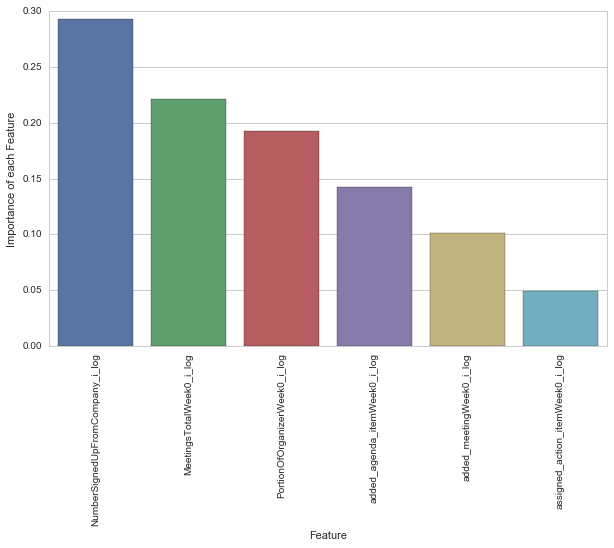

In [80]:
# plt.bar(dfsort.feature, 
#         dfsort.importance,
#         color='b',
#         abel='Feature Importance')
plt.figure(figsize=(10,6))

ax = sns.barplot(x='feature', y='importance', data=dfsort);
ax.set(xlabel='Feature', ylabel='Importance of each Feature')

for item in ax.get_xticklabels():
    item.set_rotation(90)

In [ ]:
# Define a function to plot the confusion matrix:
def plotFeatureImportance(ax, cm, title='Feature importance', cmap=plt.cm.Blues):
    # Plot the confusion matrix:
    image = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    # Plot the label on the ticks:
    tick_marks = np.arange(len(classifierLabels))
    ax.set_xticks(tick_marks, list(classifierLabels.values()))
    ax.set_yticks(tick_marks, list(classifierLabels.values()))
    locations = ax.set_xticks(tick_marks)
    labels = ax.set_xticklabels(list(classifierLabels.values()))
    for label in labels:
        label.update({'rotation':90})
    locations = ax.set_yticks(tick_marks)
    labels = ax.set_yticklabels(list(classifierLabels.values()))
    # Add colorbars:
    divider = make_axes_locatable(ax)
    colorbar_ax = divider.append_axes("right", size="10%", pad=0.05)
    colorbar = ax.figure.colorbar(image, cax=colorbar_ax)

# Create the figure:
fig, axes = plt.subplots(1, 2, figsize=(15, 15))
#fig.suptitle("Model: {version}, {model}".format(version=versionLabel, model=modelLabel), fontsize=12)
for ax in axes:
    ax.set_aspect(1)

plotFeatureImportance(axes[0], cm)

# Save the figure:
prefix = "-{version}".format(version=versionLabel)
fileName = "confusion-matrices" + prefix + ".pdf"
outputDirectory = path+"model_images"
outputPath = os.path.join(outputDirectory, fileName)
fig.savefig(outputPath, bbox_inches="tight")

### Save information into a text file

In [ ]:
prefix = "-{version}".format(version=versionLabel)
fileName = "model" + prefix + ".txt"
outputDirectory = path+"model_images"
outputPath = os.path.join(outputDirectory, fileName)
with open(outputPath, "w") as f:
    f.write("Version: {version}\n".format(version=versionLabel))
    f.write("Model:   {model}\n".format(model=modelLabel))
    f.write("\n")
    f.write("Classifier: {score:.2f}\n".format(score=classifier_score))
    f.write("Accuracy:   {score:.2f}\n".format(score=classifier_accuracy_score))
    f.write("Precision:  {score:.2f}\n".format(score=classifier_precision_score))
    f.write("Recall:     {score:.2f}\n".format(score=classifier_recall_score))
    f.write("F1:         {score:.2f}\n".format(score=classifier_f1_score))
    f.write("\n")
    f.write("Score {score}\n".format(score=classifier_classification_report))
    f.write("\n")
    if isinstance(classifier, RandomForestClassifier):
        f.write("Feature importance\n")
        for (feature, importance) in zip(features, classifier.feature_importances_):
            f.write("{feature}\t {importance:.2f}\n".format(feature=feature, importance=importance))
        f.write("\n")

### Confusion matrix

In [ ]:
# Define the labels used for the classification (escaping the dollar signs):
classifierLabels = {}
if prediction == "RetentionStatus":
    for (key, value) in incomeRanges.items():
        classifierLabels[key] = r"\${low:,}-\${high:,}".format(low=value[0], high=value[2])
# elif prediction == "binnedIncomeCategory":
#     for (key, value) in binnedIncomeRanges.items():
#         classifierLabels[key] = r"\${low:,}-\${high:,}".format(low=value[0], high=value[2])

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)

# Normalize the confusion matrix by row (i.e by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)

In [ ]:
# Define a function to plot the confusion matrix:
def plot_confusion_matrix(ax, cm, title='Confusion matrix', cmap=plt.cm.Blues):
    # Plot the confusion matrix:
    image = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    # Plot the label on the ticks:
    tick_marks = np.arange(len(classifierLabels))
    ax.set_xticks(tick_marks, list(classifierLabels.values()))
    ax.set_yticks(tick_marks, list(classifierLabels.values()))
    locations = ax.set_xticks(tick_marks)
    labels = ax.set_xticklabels(list(classifierLabels.values()))
    for label in labels:
        label.update({'rotation':90})
    locations = ax.set_yticks(tick_marks)
    labels = ax.set_yticklabels(list(classifierLabels.values()))
    # Add colorbars:
    divider = make_axes_locatable(ax)
    colorbar_ax = divider.append_axes("right", size="10%", pad=0.05)
    colorbar = ax.figure.colorbar(image, cax=colorbar_ax)

# Create the figure:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle("Model: {version}, {model}".format(version=versionLabel, model=modelLabel), fontsize=12)
for ax in axes:
    ax.set_aspect(1)

plot_confusion_matrix(axes[0], cm)
plot_confusion_matrix(axes[1], cm_normalized, title='Normalized confusion matrix')

# Save the figure:
prefix = "-{version}".format(version=versionLabel)
fileName = "confusion-matrices" + prefix + ".pdf"
outputDirectory = path+"model_images"
outputPath = os.path.join(outputDirectory, fileName)
fig.savefig(outputPath, bbox_inches="tight")